In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson
%matplotlib inline

#  Modeling Poisson spiking neurons

The spiking activity of most neurons seems highly irregular. It is possible to simulate this irregular activity (i.e., generate neuronal spike trains) under the assumption that the firing rate for that neuron is constant over some interval of time and the assumption that the precise timing of spikes is unimportant and independent of the timing of all the other spikes. 

Suppose that a neuron has a constant firing rate $r$ of 5 spikes per second. To simulate a spike train during some time interval $T$ we discretize this interval in $M$ time bins of length $dt = T/M$. Choosing $dt$ sufficiently small allows us to define a probability $p = r*dt$ that this neuron will emit a spike in each time bin. This can be verified by calculating the expected spike count over this interval which is simply the sum of the M individual probabilities and equals $rT$.

The following code initializes these parameters. We define an additional variable that specifies how many trials of length T we want to simulate. By simulating different trials we can get a distribution of the spike counts for the given parameters.

In [2]:
dt = 0.001     # Time intervals that we will be looking at
T = 2          # Total simulation time
r = 5          # Firing rate in spikes per second
p = r*dt       # Probability of a spike in a very small time interval

n_trials = 500 # Total number of trials that we will simulate

We are now ready to start generating Poisson spike trains. The procedure that we will use is to generate an array with random values sampled from the uniform interval $[0,1]$. The length of this vector equals the number of bins $M = T/dt$ in the simulated interval. If the probability of emitting a spike in a single bin equals p, we can check which values are smaller than $p$ and set these equal to 1. The other values are set to zero. That's it, we now have a spike train! For each simulated trial we collect the total number of spikes which we can obtain by simply summing over the spike array and we also calculate interval between individual spikes which we will use to generate the inter-spike-interval distribution

In [3]:
isi = np.zeros(0)
spike_count = np.zeros(n_trials)
for t in range(n_trials):
    spikes = np.random.rand(int(T/dt))
    spikes[spikes < p] = 1
    spikes[spikes < 1] = 0
    spike_count[t] = np.sum(spikes)
    isi = np.append(isi,np.diff(np.where(spikes==1)[0]))

## Spike count distribution

The distribution of spike counts is essentially a binomial distribution. But it can be shown that in the limit of very small time bins the binomial distribution can be approximated by a Poisson distribution:

$$P(n) = \frac{(rT)^n}{n!} \exp{(-rdt)}$$

With the parameters that we choose we first expect that the average spike count is approximately equal to $rT = 10$. An important property of a Poisson process is that the mean and variance are equal so if our simulated spike train is a Poisson process we expect that these values are more or less equal.

In [4]:
print(np.mean(spike_count))
print(np.var(spike_count))

9.854
10.352684


Finally we plot the distribution of our simulated spike trains and plot an overlay of the theoretical Poisson distribution that uses the rate that was used to simulate our spike trains.

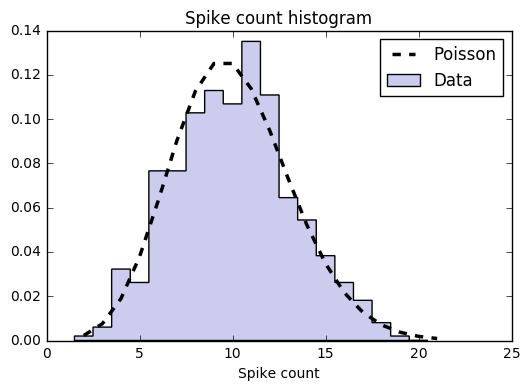

In [14]:
bins = np.arange(np.min(spike_count),np.max(spike_count),1)
plt.hist(spike_count,bins-0.5,normed = True,color=(0.0,0.0,0.7,0.2),histtype='stepfilled') # We subtract -0.5 because the values in bins represent the edges
plt.plot(bins,poisson.pmf(bins,mu=r*T),'--k',linewidth=2.5)
plt.title('Spike count histogram')
plt.xlabel('Spike count')
plt.legend(['Poisson','Data'])


## ISI distribution

As a final example we plot the inter-spike-interval distribution. For a Poisson process it can be shown that this results in an exponential distribution:

$$P(\Delta t) = r\exp{(-r\Delta t)}$$


Mean: 174.786881674


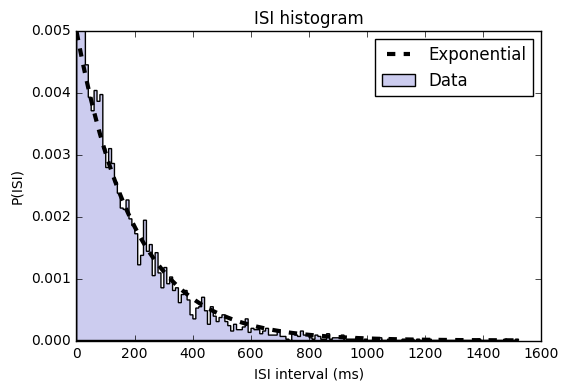

In [23]:
bins = np.arange(np.min(isi),np.max(isi),10)
plt.hist(isi,bins,normed = True, color=(0.0, 0.0, 0.7, 0.2), histtype='stepfilled')
plt.plot(bins,r*dt*np.exp(-r*bins*dt),'--k',linewidth=3.0)
plt.title('ISI histogram')
plt.xlabel('ISI interval (ms)')
plt.ylabel('P(ISI)')
plt.legend(['Exponential','Data'])
print('Mean: ' + str(np.mean(isi)))